# PCA and SVD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data file in variable data_original

data_original = pd.read_excel('./BodyFat.xls')

# Print First 10 rows of original data

print(data_original.head(10))

   IDNO  BODYFAT  DENSITY  AGE  WEIGHT  HEIGHT  ADIPOSITY  NECK  CHEST  \
0     1     12.6   1.0708   23  154.25   67.75       23.7  36.2   93.1   
1     2      6.9   1.0853   22  173.25   72.25       23.4  38.5   93.6   
2     3     24.6   1.0414   22  154.00   66.25       24.7  34.0   95.8   
3     4     10.9   1.0751   26  184.75   72.25       24.9  37.4  101.8   
4     5     27.8   1.0340   24  184.25   71.25       25.6  34.4   97.3   
5     6     20.6   1.0502   24  210.25   74.75       26.5  39.0  104.5   
6     7     19.0   1.0549   26  181.00   69.75       26.2  36.4  105.1   
7     8     12.8   1.0704   25  176.00   72.50       23.6  37.8   99.6   
8     9      5.1   1.0900   25  191.00   74.00       24.6  38.1  100.9   
9    10     12.0   1.0722   23  198.25   73.50       25.8  42.1   99.6   

   ABDOMEN    HIP  THIGH  KNEE  ANKLE  BICEPS  FOREARM  WRIST  
0     85.2   94.5   59.0  37.3   21.9    32.0     27.4   17.1  
1     83.0   98.7   58.7  37.3   23.4    30.5     28.9   

In [3]:
# I am taking Age as a prediction variable (label). That means given all the variables, predict the age.

label = data_original['AGE']

# Remove the age column from original data and store the new feature matrix into a variable feature_matrix

feature_matrix = data_original.drop("AGE", axis=1)

In [4]:
print(data_original.shape)
print(feature_matrix.shape)
print(label.shape)

(252, 17)
(252, 16)
(252,)


In [5]:
# Standardization of data

from sklearn.preprocessing import StandardScaler

standardized_features = StandardScaler().fit_transform(feature_matrix)
print(standardized_features.shape)

(252, 16)


In [6]:
# Covariance Matrix (X) = X*X^T

standardized_features_copy = standardized_features

covariance_matrix = np.matmul(standardized_features_copy.T, standardized_features_copy)
print(covariance_matrix.shape)

(16, 16)


## Covariance Matrix

In [7]:
# Covariance Matrix
feature_matrix.cov()

,IDNO,BODYFAT,DENSITY,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,5313.000000,62.683068,-0.152045,72.251494,10.931275,12.688645,12.600398,74.056375,95.669522,-12.395219,-30.884661,8.427490,-8.727490,-3.452390,0.288645,5.569522
BODYFAT,62.683068,60.075763,-0.145753,139.671527,-2.529755,20.584749,9.260466,45.928905,68.007997,34.743601,22.839571,9.492320,3.504689,11.545529,5.689682,2.515065
DENSITY,-0.152045,-0.145753,0.000362,-0.332269,0.006823,-0.049623,-0.021881,-0.109519,-0.163959,-0.083078,-0.055262,-0.022722,-0.008544,-0.028008,-0.013523,-0.005787
WEIGHT,72.251494,139.671527,-0.332269,863.722719,33.185647,95.137383,59.348441,221.548750,281.410541,198.099047,134.032185,60.473281,30.568587,71.071090,37.431343,20.023036
HEIGHT,10.931275,-2.529755,0.006823,33.185647,13.416513,-0.332605,2.259054,4.165407,3.468334,4.471301,2.854390,2.527020,1.643569,2.299789,1.692347,1.101330
ADIPOSITY,12.688645,20.584749,-0.049623,95.137383,-0.332605,13.308712,6.898222,28.042649,36.343465,23.084485,15.565277,6.279158,3.093537,8.226603,4.117792,2.131726
NECK,12.600398,9.260466,-0.021881,59.348441,2.259054,6.898222,5.909339,16.084217,19.766422,12.799440,8.878613,3.942235,1.968983,5.369868,3.063497,1.690357
CHEST,74.056375,45.928905,-0.109519,221.548750,4.165407,28.042649,16.084217,71.072918,83.254656,50.093988,32.303242,14.629275,6.901297,18.540367,9.883467,5.195850
ABDOMEN,95.669522,68.007997,-0.163959,281.410541,3.468334,36.343465,19.766422,83.254656,116.274745,67.522123,43.399068,19.171571,8.283173,22.315796,10.966889,6.239802
HIP,-12.395219,34.743601,-0.083078,198.099047,4.471301,23.084485,12.799440,50.093988,67.522123,51.323722,33.714832,14.228213,6.780108,16.001243,7.889814,4.214200


## Correlation Matrix

In [8]:
# Correlation Matrix

feature_matrix.corr()

,IDNO,BODYFAT,DENSITY,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,1.000000,0.110951,-0.109605,0.033728,0.040943,0.047717,0.071112,0.120515,0.121720,-0.023737,-0.080708,0.047939,-0.070644,-0.015677,0.001960,0.081845
BODYFAT,0.110951,1.000000,-0.988087,0.613156,-0.089106,0.727994,0.491489,0.702885,0.813706,0.625700,0.561284,0.507786,0.266783,0.493031,0.363277,0.347573
DENSITY,-0.109605,-0.988087,1.000000,-0.594062,0.097881,-0.714732,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
WEIGHT,0.033728,0.613156,-0.594062,1.000000,0.308279,0.887352,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
HEIGHT,0.040943,-0.089106,0.097881,0.308279,1.000000,-0.024891,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
ADIPOSITY,0.047717,0.727994,-0.714732,0.887352,-0.024891,1.000000,0.777857,0.911799,0.923880,0.883269,0.812706,0.713660,0.500317,0.746384,0.558594,0.625907
NECK,0.071112,0.491489,-0.472966,0.830716,0.253710,0.777857,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
CHEST,0.120515,0.702885,-0.682599,0.894191,0.134892,0.911799,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
ABDOMEN,0.121720,0.813706,-0.798955,0.887995,0.087813,0.923880,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
HIP,-0.023737,0.625700,-0.609331,0.940884,0.170394,0.883269,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090


# PCA

In [9]:
# Calculating eigen values and eigen vectors

from scipy.linalg import eigh 

values, vectors = eigh(covariance_matrix)

print("Shape of eigen vectors = ",vectors.shape)
print("Shape of eigen values = ", values.shape)


Shape of eigen vectors =  (16, 16)
Shape of eigen values =  (16,)


In [10]:
# Eigen values are in ascending order. We have to reverse it to get in descending order
reverse_eig_values = np.flipud(values)
reverse_eig_values

array([2462.81229263,  440.7673292 ,  274.0401047 ,  177.05020644,
        160.27722554,  130.67426791,  113.64158143,   70.97734482,
         62.63185873,   47.74905022,   39.46210582,   19.71806028,
         12.7308349 ,   10.60882192,    6.06554589,    2.79336958])

# Scree Plots

## Eigen Value Vs Principal Component

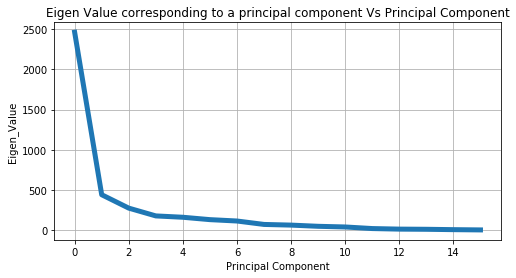

In [11]:
# Plot of Eigen Value Vs Principal Component

plt.figure(1, figsize=(8,4))
plt.clf()
plt.plot(reverse_eig_values, linewidth=5)
plt.axis('tight')
plt.grid()
plt.xlabel('Principal Component')
plt.ylabel('Eigen_Value')
plt.title('Eigen Value corresponding to a principal component Vs Principal Component')

plt.show()

## Percentage of variance by a principal component Vs Principal Component

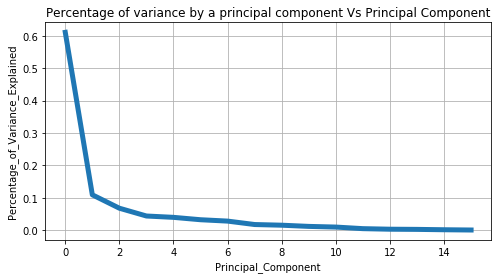

In [12]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 16
pca_data = pca.fit_transform(standardized_features_copy)

percent_variance_explained = pca.explained_variance_ratio_


# Plot of Percentage of variance by a principal component Vs Principal Component

plt.figure(1, figsize=(8, 4))
plt.clf()
plt.plot(percent_variance_explained, linewidth=5)
plt.axis('tight')
plt.grid()
plt.xlabel('Principal_Component')
plt.ylabel('Percentage_of_Variance_Explained')
plt.title('Percentage of variance by a principal component Vs Principal Component')
plt.show()



## According to Elbow method, we can choose the number of principal components = 3. After which the curves flattens out.

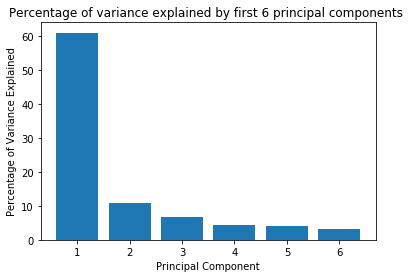

In [13]:
pca.n_components = 6
pca_data = pca.fit_transform(standardized_features_copy)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['1', '2', '3', '4', '5', '6']
plt.bar(x= range(1,7), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('Percentage of variance explained by first 6 principal components ')
plt.show()

## According to Elbow method, we can choose the number of principal components = 3. After which the curves flattens out.

## Cumulative variance explained Vs Number of principal components

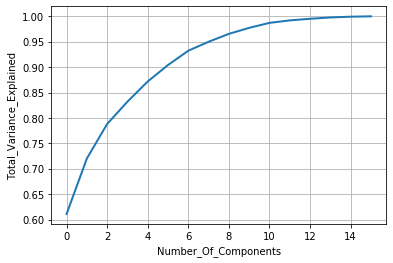

In [14]:
pca.n_components = 16
pca_data = pca.fit_transform(standardized_features_copy)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot of Cumulative variance explained Vs Number of principal components
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Number_Of_Components')
plt.ylabel('Total_Variance_Explained')
plt.show()

## It is clear from above graph that with 3 principal components we can have around 85% of variance explained.

## New Data Matrix

In [15]:
values, vectors = eigh(covariance_matrix, eigvals=(13,15))
new_coordinates = np.matmul(vectors.T, standardized_features_copy.T)
new_coordinates = new_coordinates.T
print(new_coordinates.shape)

(252, 3)


In [16]:
new_coordinates_df = np.vstack((new_coordinates.T, label)).T
dataframe = pd.DataFrame(data=new_coordinates_df, columns=("3rd_principal", "2nd_principal","1st_principal", "Age"))
print(dataframe)

     3rd_principal  2nd_principal  1st_principal   Age
0        -1.916302      -0.008989      -2.507635  23.0
1        -1.446283      -2.187420      -1.734726  22.0
2        -2.249391       1.856310      -1.816040  22.0
3        -1.454735      -1.512451      -0.658884  26.0
4        -1.789629       0.764517       0.817053  24.0
..             ...            ...            ...   ...
247       1.826806       0.671578      -4.736545  70.0
248       1.888773       1.273109       3.474278  72.0
249       1.420567       3.052867       1.452822  72.0
250       2.203406       0.606791       1.624554  72.0
251       2.008638       0.564653       4.375068  74.0

[252 rows x 4 columns]


## Scatter Plot in 2-Dim

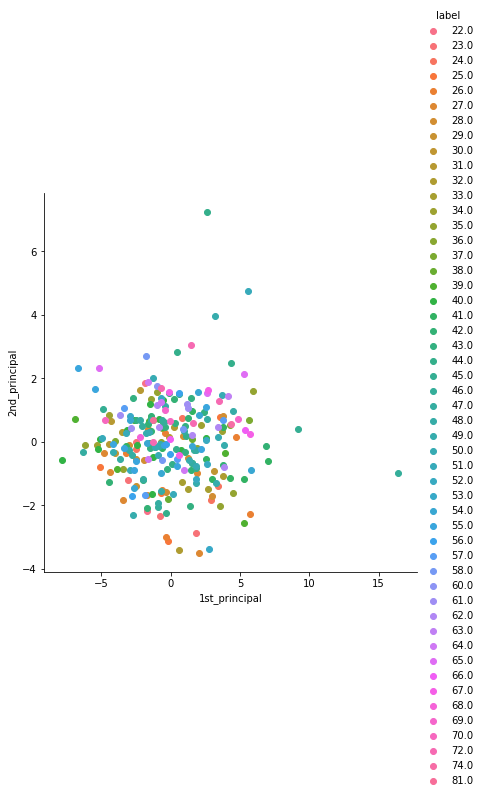

In [17]:

pca.n_components = 2
pca_data = pca.fit_transform(standardized_features_copy)

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data

import seaborn as sn

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## Scatter Plot in 3-D

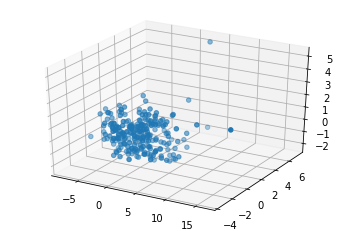

In [18]:
pca.n_components = 3
pca_data = pca.fit_transform(standardized_features_copy)
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "3rd_principal"))

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_df['1st_principal'],pca_df['2nd_principal'],pca_df["3rd_principal"])


# SVD

In [19]:
from sklearn.decomposition import TruncatedSVD

In [20]:
# Using SVD for 3 singular values

svd = TruncatedSVD(n_components = 3)
svd_reduced_features = svd.fit_transform(feature_matrix)
print(svd.explained_variance_ratio_)

[0.28267962 0.67270361 0.02940012]


In [21]:
print(svd.singular_values_)

[4858.18549357 1056.33377514  221.30580474]


In [22]:
print(svd.explained_variance_ratio_.sum())

0.9847833432570647


In [23]:
svd_dataframe = pd.DataFrame(data=svd_reduced_features,columns=['1st_dim','2nd_dim','3rd_dim'])
svd_data_array = np.vstack((svd_dataframe.T, label)).T

# New Feature Matrix
svd_dataframe.head(10)

,1st_dim,2nd_dim,3rd_dim
0,225.549573,107.340951,-16.662163
1,239.040666,113.172579,-10.113999
2,229.636867,107.004507,-14.934545
3,251.922199,117.284103,-4.765582
4,256.551083,118.278852,-0.505533
5,277.183197,127.684891,7.135132
6,252.617484,114.099609,-3.922336
7,247.288143,110.370582,-8.449204
8,257.232154,114.518443,-3.520025
9,266.110313,117.766832,0.721991


## Scatter Plot in 2 Dim


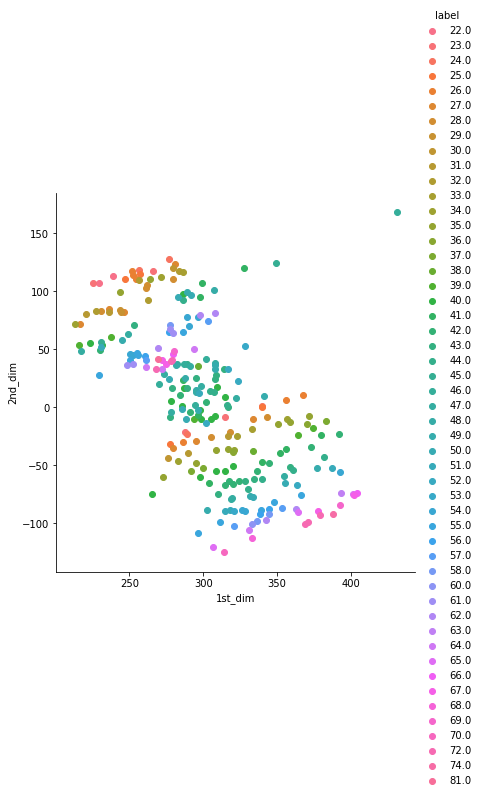

In [24]:
svd = TruncatedSVD(n_components = 2)
svd_reduced_features = svd.fit_transform(feature_matrix)

svd_dataframe = pd.DataFrame(data=svd_reduced_features,columns=['1st_dim','2nd_dim'])
svd_data_array = np.vstack((svd_dataframe.T, label)).T

svd_df = pd.DataFrame(data = svd_data_array, columns=("1st_dim", "2nd_dim", "label"))
sn.FacetGrid(svd_df, hue="label", height=6).map(plt.scatter, '1st_dim', '2nd_dim').add_legend()
plt.show()

## Scatter Plot in 3 Dim

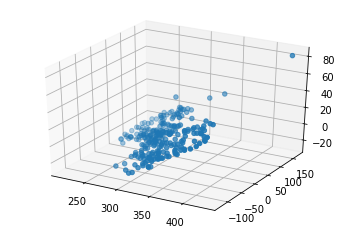

In [25]:
from mpl_toolkits.mplot3d import Axes3D
svd = TruncatedSVD(n_components = 3)
svd_reduced_features = svd.fit_transform(feature_matrix)

svd_dataframe = pd.DataFrame(data=svd_reduced_features,columns=['1st_dim','2nd_dim','3rd_dim'])



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(svd_dataframe['1st_dim'],svd_dataframe['2nd_dim'],svd_dataframe['3rd_dim'])